# Econ C142 Problem Set 2
# Sahil Chinoy

In [1]:
%matplotlib inline
import math
import scipy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Import the data
df = pd.read_stata('Brazil_1996PNAD_PS2.dta')

## Part (a)

In [3]:
# Add a constant
df = sm.add_constant(df)
# Note: we cannot take the log of monthly earnings directly, since it is sometimes zero. 
# So, we drop these observations
df = df[df['MONTHLY_EARNINGS'] > 0]
# and then take the log
df['LOG_MONTHLY_EARNINGS'] = np.log(df['MONTHLY_EARNINGS'])
# Total number of observations
N = len(df)
# Endogenous variable: log monthly earnings
y = df['LOG_MONTHLY_EARNINGS']
# Exogenous variables...
X = pd.DataFrame()
# ... constant
X['c'] = df['const']
# ... years of schooling
X['YRSSCH'] = df['YRSSCH']
# ... age
X['AgeInDays'] = df['AgeInDays']
# ... age squared
X['AgeInDays_Squared'] = df['AgeInDays']**2

In [4]:
# Compute the least-squares fit
res1 = sm.OLS(y, X).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     LOG_MONTHLY_EARNINGS   R-squared:                       0.420
Model:                              OLS   Adj. R-squared:                  0.420
Method:                   Least Squares   F-statistic:                 1.340e+04
Date:                  Wed, 03 May 2017   Prob (F-statistic):               0.00
Time:                          13:34:22   Log-Likelihood:                -64167.
No. Observations:                 55550   AIC:                         1.283e+05
Df Residuals:                     55546   BIC:                         1.284e+05
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
c                     3.0452      0.043     70.501      0.000         2.960     3.130
YRSSCH                0.1456      0.001    185.872      0.000         0.144     0.147
AgeInDays             0.0893      0.002     37.802      0.000         0.085     0.094
AgeInDays_Squared    -0.0009   3.04e-05    -29.683      0.000        -0.001    -0.001
==============================================================================
Omnibus:                     1093.915   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2209.058
Skew:                           0.094   Prob(JB):                         0.00
Kurtosis:                       3.959   Cond. No.                     2.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can read off the 95% confidence interval for YRSSCH: $[0.144,0.147]$.

The expected difference in log earnings for an individual with no schooling and an individual who has completed primary school is $8 \cdot 0.146 = 1.17$, or in linear terms, about a 120% increase in earnings.

## Part (b)

In [5]:
# Endogenous variable
y = df['LOG_MONTHLY_EARNINGS']
# Exogenous variables...
# ... dummies for years of school
X = pd.get_dummies(df['YRSSCH'], prefix='YRSSCH')
# ... age
X['AgeInDays'] = df['AgeInDays']
# ... age squared
X['AgeInDays_Squared'] = df['AgeInDays']**2
# Compute the least-squares fit
res2 = sm.OLS(y, X).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     LOG_MONTHLY_EARNINGS   R-squared:                       0.984
Model:                              OLS   Adj. R-squared:                  0.984
Method:                   Least Squares   F-statistic:                 1.851e+05
Date:                  Wed, 03 May 2017   Prob (F-statistic):               0.00
Time:                          13:34:23   Log-Likelihood:                -63743.
No. Observations:                 55550   AIC:                         1.275e+05
Df Residuals:                     55532   BIC:                         1.277e+05
Df Model:                            18                                         
Covariance Type:              nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
YRSSCH_0.0            3.1424      0.044     71.094      0.000         3.056     3.229
YRSSCH_1.0            3.3432      0.047     70.739      0.000         3.251     3.436
YRSSCH_2.0            3.4798      0.045     76.506      0.000         3.391     3.569
YRSSCH_3.0            3.6100      0.045     80.456      0.000         3.522     3.698
YRSSCH_4.0            3.8040      0.044     85.728      0.000         3.717     3.891
YRSSCH_5.0            3.8896      0.044     87.841      0.000         3.803     3.976
YRSSCH_6.0            3.9779      0.045     88.211      0.000         3.889     4.066
YRSSCH_7.0            4.0545      0.045     89.833      0.000         3.966     4.143
YRSSCH_8.0            4.2004      0.044     94.449      0.000         4.113     4.288
YRSSCH_9.0            4.2735      0.049     87.711      0.000         4.178     4.369
YRSSCH_10.0           4.3868      0.048     92.096      0.000         4.293     4.480
YRSSCH_11.0           4.6883      0.046    102.737      0.000         4.599     4.778
YRSSCH_12.0           4.9364      0.058     84.682      0.000         4.822     5.051
YRSSCH_13.0           5.0792      0.058     86.999      0.000         4.965     5.194
YRSSCH_14.0           5.1801      0.058     89.682      0.000         5.067     5.293
YRSSCH_15.0           5.5794      0.047    119.162      0.000         5.488     5.671
AgeInDays             0.0857      0.002     36.306      0.000         0.081     0.090
AgeInDays_Squared    -0.0009   3.03e-05    -29.031      0.000        -0.001    -0.001
==============================================================================
Omnibus:                     1197.043   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2511.036
Skew:                           0.098   Prob(JB):                         0.00
Kurtosis:                       4.023   Cond. No.                     9.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The expected difference in log earnings for an individual with no schooling and an individual who has completed primary school is $4.20 - 3.14 = 1.06$, or in linear terms, about a 106% increase in earnings. This is comparable to the estimate from the model in part (a).

However, consider the difference between completing 6 years of school and 5 years of school ($4.05 - 3.98 = 0.07$), versus the difference between completing 13 years of school and 12 years of school ($5.07 - 4.93 = 0.14$). This suggests that the effects of an additional year of school are not constant across the population, motivating a quantile regression approach.

## Part (c)

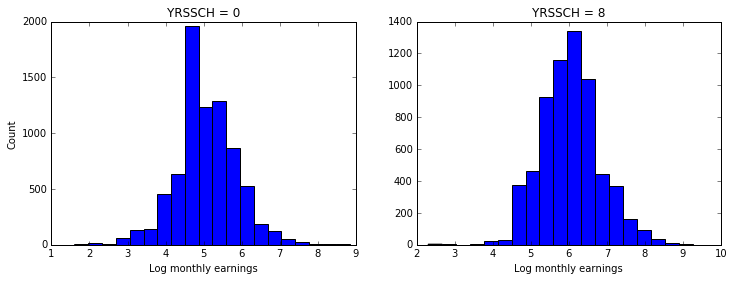

In [6]:
# Plot histogram
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.hist(df[df['YRSSCH'] == 0]['LOG_MONTHLY_EARNINGS'], 20)
ax1.set_xlabel('Log monthly earnings')
ax1.set_ylabel('Count')
ax1.set_title('YRSSCH = 0')
ax2 = fig.add_subplot(122)
ax2.hist(df[df['YRSSCH'] == 8]['LOG_MONTHLY_EARNINGS'], 20)
ax2.set_xlabel('Log monthly earnings')
ax1.set_ylabel('Count')
ax2.set_title('YRSSCH = 8')
plt.show()

The distribution of log earnings is centered around 5 for no schooling, and around 6 for 8 years of schooling. Both look approximately normal, but there is an abnormally large bin in the no schooling distribution around 4.8. This is probably due to a clustering effect — perhaps this represents the monthly earnings for a minimum wage job.

## Part (d)

In [7]:
def quantile_estimate(data, tau):
    """
    Takes a data series and a quantile and,
    if there are more than 80 observations,
    returns (pi, sigma2, se), where
    - pi is an estimate of the quantile
    - sigma2 is an estimate of the variance,
    - se is an estimate of the standard error.
    """
    # Sort the data
    data = sorted(data)
    n = len(data)
    # If there are fewer than 80 observations, quit
    if n < 80:
        return None, None, None
    # Estimate of the quantile
    pi = np.percentile(data, q=tau*100)
    # z-value for a 95% confidence interval
    z = scipy.stats.norm.ppf(0.975)
    l = z*math.sqrt(n*tau*(1-tau))
    # Index of lower bound
    j = math.floor(n*tau - l)
    # Lower bound of CI
    lbound = data[j-1]
    # Index of upper bound
    k = math.ceil(n*tau + l)
    # Upper bound of CI
    ubound = data[k-1]
    # Variance estimator
    sigma2 = n*(ubound-lbound)**2/(4*z**2)    
    # Standard error estimator
    se = math.sqrt(sigma2/n)
    return pi, sigma2, se

In [8]:
# We'll store our estimates here
estimates = pd.DataFrame(columns=[
        'L', # age bin
        'K', # school bin
        'p', # proportion of observations in this bin
        'tau', # quantile of interest
        'pi', # quantile estimate
        'sigma2', # variance estimate,
        'se' # standard error estimate
    ])
# Quantiles we're interested in
quantiles = [0.10, 0.25, 0.5, 0.75, 0.90]
# School bins from 0 to 15
schoolbins = range(0, 16)
# Age bins from [20, 25) ... [55, 60)
agebins = range(20, 60, 5)

In [9]:
for L in agebins:
    for K in schoolbins:
        # Select the subset of data we want
        subset = df[(df.AgeInDays >= L) & (df.AgeInDays < (L + 5)) & (df.YRSSCH == K)]
        # Series of log earnings from this subset
        earnings_series = subset['LOG_MONTHLY_EARNINGS']
        # Proportion of observations in this bin
        p = len(earnings_series)/N
        # For each quantile of interest
        for tau in quantiles:
            # Compute the estimate and standard deviation
            pi, sigma2, se = quantile_estimate(earnings_series, tau)
            estimates = estimates.append({
                'L': L,
                'K': K,
                'tau': tau,
                'p': p,
                'pi': pi,
                'sigma2': sigma2,
                'se': se
            }, ignore_index=True)

In [10]:
estimates.head()

,L,K,p,tau,pi,sigma2,se
0,20.0,0.0,0.013645,0.10,3.912023,2.456302,0.056925
1,20.0,0.0,0.013645,0.25,4.442651,2.456302,0.056925
2,20.0,0.0,0.013645,0.50,4.787492,0.234814,0.017601
3,20.0,0.0,0.013645,0.75,5.298317,0.000000,0.000000
4,20.0,0.0,0.013645,0.90,5.703783,3.006177,0.062976


## Part (e)

Let's look at the bins where the standard error estimate is zero.

In [11]:
zeros = estimates[estimates['se'] == 0]
print(len(zeros))
zeros.head()

11


,L,K,p,tau,pi,sigma2,se
3,20.0,0.0,0.013645,0.75,5.298317,0.0,0.0
16,20.0,3.0,0.011377,0.25,4.718499,0.0,0.0
25,20.0,5.0,0.019586,0.10,4.718499,0.0,0.0
30,20.0,6.0,0.013195,0.10,4.718499,0.0,0.0
35,20.0,7.0,0.012979,0.10,4.718499,0.0,0.0


There are 11 bins for which the standard error estimate is zero. Let's see what's going on in the first one:

In [12]:
L = 20
K = 0
subset = df[(df.AgeInDays >= L) & (df.AgeInDays < (L + 5)) & (df.YRSSCH == K)]
subset['LOG_MONTHLY_EARNINGS'].value_counts().head()

4.718499    84
4.605170    62
4.787492    58
4.382027    57
5.298317    50
Name: LOG_MONTHLY_EARNINGS, dtype: int64

We have 84 observations with `LOG_MONTHLY_EARNINGS` equal to 4.718499, so `MONTHLY_EARNINGS` is clearly not a continuously-valued random variable; there are certain earnings levels which are shared by many people in the sample. This is causing our standard error estimates to sometimes be zero — if our 95% confidence interval falls within one of these clusters, then the length of the interval and thus the standard error will be 0.

## Part (f)

Note: we correct the standard error reported by the WLS program, $se^*(\alpha)$, with the following:

$$se(\alpha) = \frac{se^*(\alpha)}{\sqrt{s^2}} \sqrt{\frac{L}{N}},$$

where $s^2$ is the standard error of the regression, $N$ is the total number of observations, and $L$ is the total number of bins.

In [13]:
def quantile_regress(data):
    """
    Takes a data series and returns (alpha, se), where
    - alpha is the coefficient on YRSSCH
    - se is a standard error estimate.
    """
    # Endogenous variable
    y = data['pi']
    # Exogenous variables
    X = pd.DataFrame()
    # Midpoint of the age range
    X['AgeInDays'] = data['L'] + 2.5
    X['AgeInDays_Squared'] = X['AgeInDays']**2
    X['YRSSCH'] = data['K']
    # WLS weights
    weights = data['p']/(data['sigma2'])
    # Fit the model
    res = sm.WLS(y, X, weights).fit()
    # Coefficient on YRSSCH
    alpha = res.params['YRSSCH']
    # Square root of the standard error of the regression
    # (Statsmodels takes care of the degrees of freedom correction
    # so this is an unbiased estimator)
    s = math.sqrt(res.mse_resid)
    # Number of bins
    L = len(data)
    # Corrected standard error for alpha
    #se = res.bse['YRSSCH']/s * math.sqrt(L/N)
    se = res.bse['YRSSCH']/s * math.sqrt(1/N)
    return alpha, se

In [14]:
# We'll store our estimates here
coeff_estimates = pd.DataFrame(columns=[
        'tau', # quantile
        'alpha', # coefficient on YRSSCH
        'se', # standard error of coefficient on YRSSCH
    ])

for quantile in quantiles:
    # Drop if the standard error is 0
    data = estimates[(estimates.tau == quantile) & (estimates.se > 0)].dropna()
    alpha, se = quantile_regress(data)
    coeff_estimates = coeff_estimates.append({
            'tau': quantile,
            'alpha': alpha,
            'se': se
        }, ignore_index=True)

coeff_estimates.head()

,tau,alpha,se
0,0.10,0.129345,0.001563
1,0.25,0.139102,0.000722
2,0.50,0.142337,0.000961
3,0.75,0.145653,0.000731
4,0.90,0.143172,0.001335


The coefficient on schooling increases with the quantile under consideration from the 0.10 to the 0.75 quantile, then decreases again at the 0.90 quantile. So, it seems as though the returns to schooling are greater at higher quantiles in the earnings distribution. If you earn more, schooling is likely to have a larger effect on your earnings; the earnings of those who earn less (and those who earn the very most) are not affected by their schooling levels as much.

The coefficients are all lower than the standard OLS estimate, 0.146. This indicates that the returns to schooling might be very high for some individuals, which is biasing the estimate upwards. The median individual's returns to schooling are lower than the average individual's returns.

## Part (g)

Earnings increase with education. On *average*, an extra year of education leads to a 0.145 log point increase in earnings. However, these returns vary dramatically across the year in consideration; for example, the returns from going from 12 to 13 years of school are much greater than the returns from going from 5 to 6 years of school. 

The effect of an extra year of education also varies across the earnings distribution. For the lowest earners, the effects of schooling is not as significant (perhaps these are individuals who are unemployed for reasons unrelated to schooling or training); an extra year of education produces about a 0.130 log point increase in earnings. Upper-middle income individuals see the greatest returns to education, about a 0.146 log point increase in earnings for each additional year of education. These might be those with "regular" white-collar jobs for whom a college degree or a postgraduate degree could have a significant impact on their career trajectory. For the *very* highest earners, an extra year of schooling also doesn't have as much of an effect as for those who earn a bit less (think child prodigies and college-dropouts-turned-billionaires). For them, an extra year of education produces about a 0.143 log point increase in earnings.

In general, the fact that the coefficient from the OLS estimate is larger than most of the coefficients from the quantile regression suggests that there are relatively many highly-educated individuals who also earn a lot; the highly-paid and highly-educated professionals are probably biasing the results upwards for the population as a whole, which includes lower-paid workers who experience lower returns to education.

## Part (h)

In [15]:
# Centiles 0.05 to 0.95
quantiles2 = np.arange(0.05, 1.0, 0.05)

# We'll store our estimates here
estimates2 = pd.DataFrame(columns=[
        'L', # age bin
        'K', # school bin
        'p', # proportion of observations in this bin
        'tau', # quantile of interest
        'pi', # quantile estimate
        'sigma2', # variance estimate
        'se' # standard error estimate
    ])

In [16]:
for L in agebins:
    for K in schoolbins:
        # Select the subset of data we want
        subset = df[(df.AgeInDays >= L) & (df.AgeInDays < (L + 5)) & (df.YRSSCH == K)]
        # Series of log earnings from this subset
        earnings_series = subset['LOG_MONTHLY_EARNINGS']
        # Proportion of observations in this bin
        p = len(earnings_series)/N
        # For each quantile of interest
        for tau in quantiles2:
            # Compute the estimate and standard deviation
            pi, sigma2, se = quantile_estimate(earnings_series, tau)
            estimates2 = estimates2.append({
                'L': L,
                'K': K,
                'tau': tau,
                'p': p,
                'pi': pi,
                'sigma2': sigma2,
                'se': se
            }, ignore_index=True)

In [17]:
# We'll store our coefficient estimates here
coeff_estimates2 = pd.DataFrame(columns=[
        'tau', # quantile
        'alpha', # coefficient on YRSSCH
        'se', # standard error of coefficient on YRSSCH
    ])

for quantile in quantiles2:
    data = estimates2[(estimates2.tau == quantile) & (estimates2.se > 0)].dropna()
    alpha, se = quantile_regress(data)
    coeff_estimates2 = coeff_estimates2.append({
            'tau': quantile,
            'alpha': alpha,
            'se': se
        }, ignore_index=True)

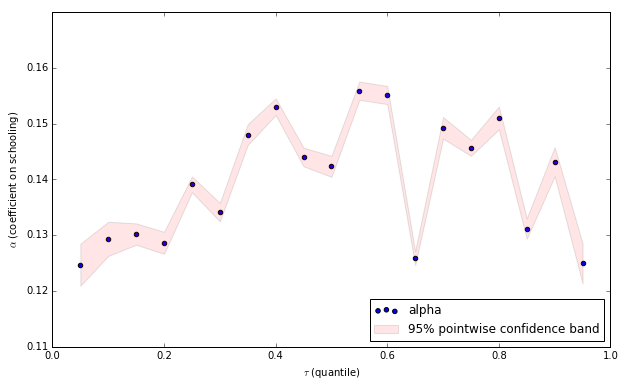

In [18]:
# Plot with standard errors 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_xlim([0,1])
ax.set_xlabel(r'$\tau$ (quantile)')
ax.set_ylabel(r'$\alpha$ (coefficient on schooling)')
# Plot scatter of normalized costs against log output
ax.scatter(coeff_estimates2['tau'], coeff_estimates2['alpha'])
# z-value for a 95% confidence interval
z = scipy.stats.norm.ppf(0.975)
# CI lower and upper bounds
lower = coeff_estimates2['alpha'] - z*coeff_estimates2['se']
upper = coeff_estimates2['alpha'] + z*coeff_estimates2['se']
# Plot confidence band
ax.fill_between(
    coeff_estimates2['tau'],
    lower,
    upper,
    facecolor='red',
    alpha=0.1,
    label='95% pointwise confidence band'
)
plt.legend(loc='lower right')
plt.show()

This plot looks roughly U-shaped; it's certainly not monotonically increasing. It appears as though the returns to schooling increase from the lowest quantiles to about the median of the earnings distribution, after which the returns stay approximately constant and even decrease towards the upper quantiles. The data is relatively noisy, though — given the size of the standard errors, it could be that the returns are flat across the population.